In [1]:
#import os
#import pathlib

#import matplotlib.pyplot as plt
#import numpy as np

import tensorflow as tf

seed = 1069

2024-06-26 14:34:13.872689: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 14:34:13.872807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 14:34:14.012528: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
root = "/kaggle/input/125files-50class/train/melspectogram_reduce_noise_set_birds_split"  # Directory with the subsets of the data

batch_size = 32  # Size of the batches of data
image_size = (255, 255)  # Size to resize images to after they are read from disk

# Generate the training dataset from image files in the corresponding directory
train = tf.keras.utils.image_dataset_from_directory(root, batch_size = batch_size, image_size = image_size, seed = seed)

train_ord = tf.keras.utils.image_dataset_from_directory(root, batch_size = batch_size, image_size = image_size, seed = seed, shuffle=False)

Found 50941 files belonging to 50 classes.
Found 50941 files belonging to 50 classes.


In [6]:
root = "/kaggle/input/125files-50class/validation/melspectogram_reduce_noise_set_birds"

# Generate the validation dataset from image files in the corresponding directory
validation = tf.keras.utils.image_dataset_from_directory(root, batch_size = batch_size, image_size = image_size, seed = seed)

validation_ord = tf.keras.utils.image_dataset_from_directory(root, batch_size = batch_size, image_size = image_size, seed = seed, shuffle=False)

Found 508 files belonging to 50 classes.
Found 508 files belonging to 50 classes.


In [7]:
root = "/kaggle/input/125files-50class/test/melspectogram_reduce_noise_set_birds"  # Directory with the subsets of the data

# Generate the training dataset from image files in the corresponding directory
test = tf.keras.utils.image_dataset_from_directory(root, batch_size = batch_size, image_size = image_size, seed = seed, shuffle=False)

test_ord = tf.keras.utils.image_dataset_from_directory(root, batch_size = batch_size, image_size = image_size, seed = seed, shuffle=False)

Found 508 files belonging to 50 classes.
Found 508 files belonging to 50 classes.


# Distribución train

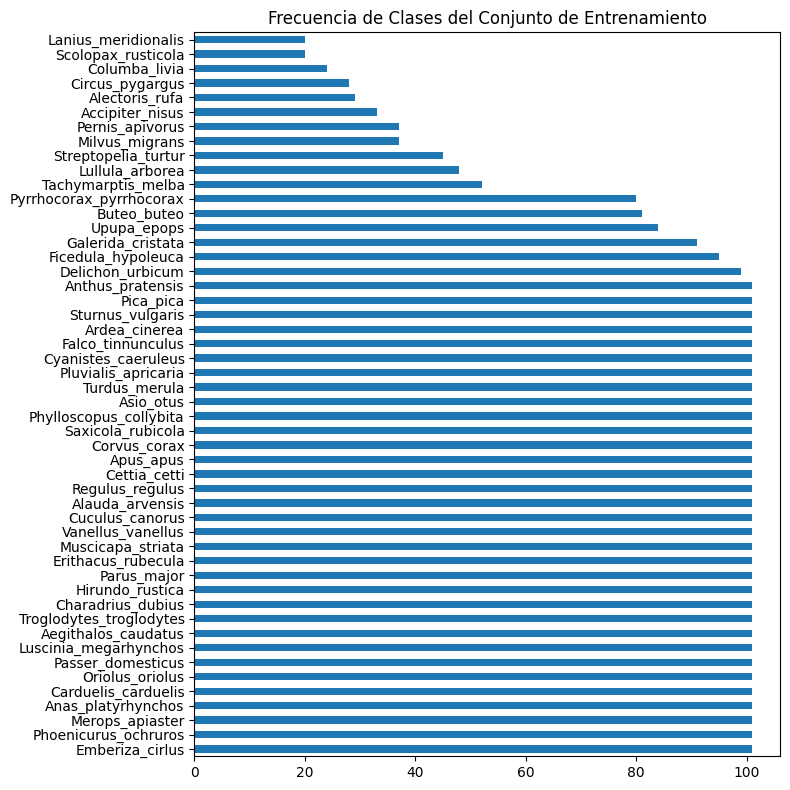

In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Función para extraer el nombre de la clase del path del archivo
function = lambda file: file.split(os.sep)[6]

# Supongamos que 'train.file_paths' es una lista de rutas a archivos
iterable = train.file_paths
generator = map(function, iterable)

# Convertir el generador en una lista de datos
data = list(generator)

# Configuración de los parámetros de visualización
normalize = True  # Usar frecuencias relativas
sort = True       # Ordenar por frecuencia
kind = "barh"     # Tipo de gráfico de barras horizontales

# Crear una serie de pandas y contar las frecuencias de los valores
value_counts = pd.Series(data).value_counts(sort=sort)

# Crear el gráfico
ax = value_counts.plot(kind=kind, figsize=(8, 8), title='Frecuencia de Clases del Conjunto de Entrenamiento')

# Ajustar los títulos de las clases para que estén más separados
plt.yticks(rotation=0)  # Mantener los títulos horizontales

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Distribución validation

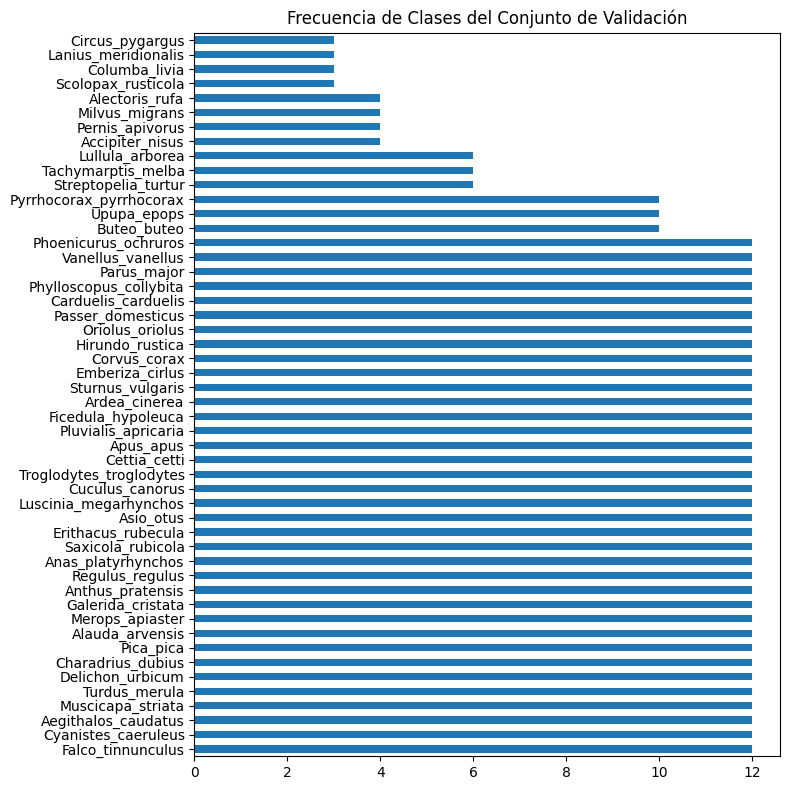

In [32]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Función para extraer el nombre de la clase del path del archivo
function = lambda file: file.split(os.sep)[6]

# Supongamos que 'train.file_paths' es una lista de rutas a archivos
iterable = validation.file_paths
generator = map(function, iterable)

# Convertir el generador en una lista de datos
data = list(generator)

# Configuración de los parámetros de visualización
normalize = True  # Usar frecuencias relativas
sort = True       # Ordenar por frecuencia
kind = "barh"     # Tipo de gráfico de barras horizontales

# Crear una serie de pandas y contar las frecuencias de los valores
value_counts = pd.Series(data).value_counts(sort=sort)

# Crear el gráfico
ax = value_counts.plot(kind=kind, figsize=(8, 8), title='Frecuencia de Clases del Conjunto de Validación')

# Ajustar los títulos de las clases para que estén más separados
plt.yticks(rotation=0)  # Mantener los títulos horizontales

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Distribución test

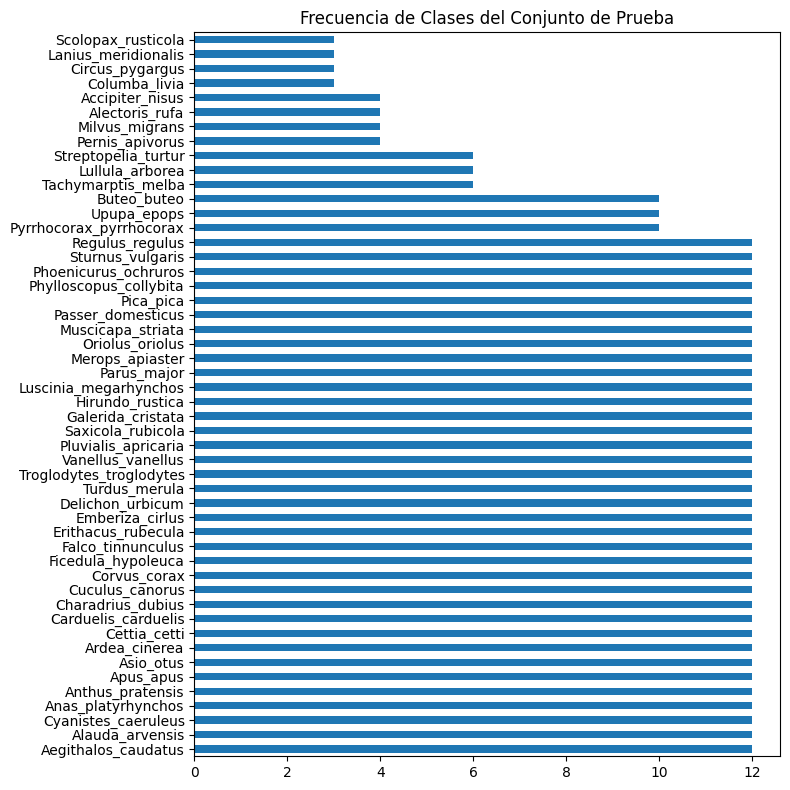

In [33]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Función para extraer el nombre de la clase del path del archivo
function = lambda file: file.split(os.sep)[6]

# Supongamos que 'train.file_paths' es una lista de rutas a archivos
iterable = test.file_paths
generator = map(function, iterable)

# Convertir el generador en una lista de datos
data = list(generator)

# Configuración de los parámetros de visualización
normalize = True  # Usar frecuencias relativas
sort = True       # Ordenar por frecuencia
kind = "barh"     # Tipo de gráfico de barras horizontales

# Crear una serie de pandas y contar las frecuencias de los valores
value_counts = pd.Series(data).value_counts(sort=sort)

# Crear el gráfico
ax = value_counts.plot(kind=kind, figsize=(8, 8), title='Frecuencia de Clases del Conjunto de Prueba')

# Ajustar los títulos de las clases para que estén más separados
plt.yticks(rotation=0)  # Mantener los títulos horizontales

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [8]:
batch_size = 32  # Size of the batches of data
image_size = (255, 255)  # Size to resize images to after they are read from disk

scale = 1 / 255  # The scale to apply to the inputs.
input_shape = (*image_size, 3)  # Arbitrary

In [9]:
from collections import defaultdict
models = defaultdict(dict)

import matplotlib.pyplot as plt
import numpy as np

In [11]:
reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5 , verbose=1, mode='min', restore_best_weights= True) 

callbacks= [reduceLR, early_stopping]

In [8]:
y_train = []
y_validation = []
y_test = []

# Ahora puedes iterar a través del dataset y acceder a los datos y etiquetas en el mismo orden original
for data, label in test_ord:
    # data es un dato de entrenamiento
    # label es la etiqueta correspondiente
    y_test.append(label)
    
y_test = np.concatenate(y_test)

for data, label in validation_ord:
    # data es un dato de entrenamiento
    # label es la etiqueta correspondiente
    y_validation.append(label)
    
y_validation = np.concatenate(y_validation)

for data, label in train_ord:
    # data es un dato de entrenamiento
    # label es la etiqueta correspondiente
    y_train.append(label)
    
y_train = np.concatenate(y_train)
    


In [24]:
input_shape = (*image_size, 3)
include_top = False  # Whether to include the layers at the top of the network


models["Transfer learning VGG19"]["model"] =  tf.keras.applications.vgg19.VGG19(include_top=include_top, input_shape=input_shape)
models["Transfer learning VGG19"]["model"].trainable = True

print(len(models["Transfer learning VGG19"]["model"].layers))

for layer in models["Transfer learning VGG19"]["model"].layers[:15]: #400
    layer.trainable = False

inputs = tf.keras.Input(shape=input_shape)

x = tf.keras.applications.vgg19.preprocess_input(inputs)

x = models["Transfer learning VGG19"]["model"](x)

x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128, activation="relu")(x)

x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(256, activation="relu")(x)

x = tf.keras.layers.Dropout(0.5)(x)

units = len(train.class_names)
outputs = tf.keras.layers.Dense(units, activation="softmax")(x)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
22


In [25]:
models["Transfer learning VGG19"]["model"] = tf.keras.Model(inputs, outputs)
print(models["Transfer learning VGG19"]["model"].summary(80))

lr = 0.001
data_format = "channels_last"  # The ordering of the dimensions in the inputs
optimizer = tf.keras.optimizers.Adam(lr)  # Optimizer instance
metrics = ["accuracy"]  # List of metrics to be evaluated by the model during training and testing
loss = "sparse_categorical_crossentropy"  # Loss function

models["Transfer learning VGG19"]["model"].compile(optimizer, loss, metrics=metrics)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)          ┃ Output Shape      ┃     Param # ┃ Connected to       ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4         │ (None, 255, 255,  │           0 │ -                  │
│ (InputLayer)          │ 3)                │             │                    │
├───────────────────────┼───────────────────┼─────────────┼────────────────────┤
│ get_item (GetItem)    │ (None, 255, 255)  │           0 │ input_layer_4[0][… │
├───────────────────────┼───────────────────┼─────────────┼────────────────────┤
│ get_item_1 (GetItem)  │ (None, 255, 255)  │           0 │ input_layer_4[0][… │
├───────────────────────┼───────────────────┼─────────────┼────────────────────┤
│ get_item_2 (GetItem)  │ (None, 255, 255)  │           0 │ input_layer_4[0][… │
├───────────────────────┼───────────────────┼─────────────┼────────────────────┤
│ stack (Stack)         │ (None, 255, 255,  │           0 │ get_item[0][0],    │
│                       │ 3)                │             │ get_item_1[0][0],  │
│                       │                   │             │ get_item_2[0][0]   │
├───────────────────────┼───────────────────┼─────────────┼────────────────────┤
│ add (Add)             │ (None, 255, 255,  │           0 │ stack[0][0]        │
│                       │ 3)                │             │                    │
├───────────────────────┼───────────────────┼─────────────┼────────────────────┤
│ vgg19 (Functional)    │ (None, 7, 7, 512) │  20,024,384 │ add[0][0]          │
├───────────────────────┼───────────────────┼─────────────┼────────────────────┤
│ dropout_12 (Dropout)  │ (None, 7, 7, 512) │           0 │ vgg19[0][0]        │
├───────────────────────┼───────────────────┼─────────────┼────────────────────┤
│ flatten_4 (Flatten)   │ (None, 25088)     │           0 │ dropout_12[0][0]   │
├───────────────────────┼───────────────────┼─────────────┼────────────────────┤
│ dense_11 (Dense)      │ (None, 128)       │   3,211,392 │ flatten_4[0][0]    │
├───────────────────────┼───────────────────┼─────────────┼────────────────────┤
│ dropout_13 (Dropout)  │ (None, 128)       │           0 │ dense_11[0][0]     │
├───────────────────────┼───────────────────┼─────────────┼────────────────────┤
│ dense_12 (Dense)      │ (None, 256)       │      33,024 │ dropout_13[0][0]   │
├───────────────────────┼───────────────────┼─────────────┼────────────────────┤
│ dropout_14 (Dropout)  │ (None, 256)       │           0 │ dense_12[0][0]     │
├───────────────────────┼───────────────────┼─────────────┼────────────────────┤
│ dense_13 (Dense)      │ (None, 50)        │      12,850 │ dropout_14[0][0]   │
└───────────────────────┴───────────────────┴─────────────┴────────────────────┘

 Total params: 23,281,650 (88.81 MB)

 Trainable params: 23,281,650 (88.81 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
models["Transfer learning VGG19"]["history"] = models["Transfer learning VGG19"]["model"].fit(x = train, validation_data = validation, epochs=2)

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, average_precision_score, f1_score

conjunto = ["train", "validation", "test"]
conjunto_y = [y_train, y_validation, y_test]


for i, dataset in enumerate([train_ord, validation_ord, test_ord]):
    
    y_pred = models["Transfer learning VGG19"]["model"].predict(dataset)

    y_pred = np.argmax(y_pred, axis=1)

    y = conjunto_y[i]

    accuracy = accuracy_score(y, y_pred)
    print(conjunto[i])
    print("Accuracy:", accuracy)
    print("Recall_macro: ", recall_score(y, y_pred, average='macro'))
    print("Precision_macro: ", precision_score(y, y_pred, average='macro'))
    print("f1_score_macro: ", f1_score(y, y_pred, average='macro'))

4730/4730 ━━━━━━━━━━━━━━━━━━━━ 1087s 230ms/step
train
Accuracy: 0.056674705163357667
Recall_macro:  0.02
Precision_macro:  0.0011334941032671534
f1_score_macro:  0.0021453983855739592


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


176/176 ━━━━━━━━━━━━━━━━━━━━ 42s 238ms/step
validation
Accuracy: 0.033072546230440966
Recall_macro:  0.02
Precision_macro:  0.0006614509246088194
f1_score_macro:  0.0012805507745266781


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


174/175 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step

2024-06-17 12:14:02.676780: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 62: 3.26326, expected 2.82028
2024-06-17 12:14:02.676842: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 63: 3.16883, expected 2.72585
2024-06-17 12:14:02.676860: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 74: 3.33977, expected 2.89679
2024-06-17 12:14:02.676880: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 91: 2.84664, expected 2.40366
2024-06-17 12:14:02.676894: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 118: 3.14222, expected 2.69924
2024-06-17 12:14:02.676905: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 170: 3.30307, expected 2.86009
2024-06-17 12:14:02.676917: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 203: 3.13993, expected 2.69695
2024-06-17 12:14:02.676928: E external/local_

175/175 ━━━━━━━━━━━━━━━━━━━━ 56s 320ms/step
test
Accuracy: 0.020601934790397708
Recall_macro:  0.02
Precision_macro:  0.00041203869580795416
f1_score_macro:  0.0008074425136036512


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Creación del modelo Xception

In [10]:
input_shape = (*image_size, 3)
include_top = False  # Whether to include the layers at the top of the network


models["Transfer learning xception"]["model"] =  tf.keras.applications.xception.Xception(include_top=include_top, input_shape=input_shape)
models["Transfer learning xception"]["model"].trainable = True

print(len(models["Transfer learning xception"]["model"].layers))

for layer in models["Transfer learning xception"]["model"].layers[:110]: #110
    layer.trainable = False

inputs = tf.keras.Input(shape=input_shape)

#resize = tf.keras.Sequential([
#  tf.keras.layers.Resizing(256, 256),
#])

#x = resize(inputs)

x = tf.keras.applications.xception.preprocess_input(inputs)

#x = tf.keras.layers.BatchNormalization()(x)

x = models["Transfer learning xception"]["model"](x)

x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128, activation="relu")(x)

x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(256, activation="relu")(x)

x = tf.keras.layers.Dropout(0.5)(x)

units = len(train.class_names)
outputs = tf.keras.layers.Dense(units, activation="softmax")(x)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
132


In [11]:
models["Transfer learning xception"]["model"] = tf.keras.Model(inputs, outputs)
print(models["Transfer learning xception"]["model"].summary(80))

lr = 0.001
data_format = "channels_last"  # The ordering of the dimensions in the inputs
optimizer = tf.keras.optimizers.Adam(lr)  # Optimizer instance
metrics = ["accuracy"]  # List of metrics to be evaluated by the model during training and testing
loss = "sparse_categorical_crossentropy"  # Loss function

models["Transfer learning xception"]["model"].compile(optimizer, loss, metrics = metrics)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)        │ (None, 255, 255, 3)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ true_divide (TrueDivide)          │ (None, 255, 255, 3)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ subtract (Subtract)               │ (None, 255, 255, 3)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ xception (Functional)             │ (None, 8, 8, 2048)       │    20,861,480 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout (Dropout)                 │ (None, 8, 8, 2048)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten (Flatten)                 │ (None, 131072)           │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                     │ (None, 128)              │    16,777,344 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_1 (Dropout)               │ (None, 128)              │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 256)              │        33,024 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_2 (Dropout)               │ (None, 256)              │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_2 (Dense)                   │ (None, 50)               │        12,850 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 37,684,698 (143.76 MB)

 Trainable params: 24,687,586 (94.18 MB)

 Non-trainable params: 12,997,112 (49.58 MB)

None


In [ ]:
models["Transfer learning xception"]["history"] = models["Transfer learning xception"]["model"].fit(x = train, validation_data = validation, epochs=10)

Epoch 1/10
   1/1592 ━━━━━━━━━━━━━━━━━━━━ 14:07:04 32s/step - accuracy: 0.0000e+00 - loss: 3.9943

I0000 00:00:1719412578.329584      91 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1592/1592 ━━━━━━━━━━━━━━━━━━━━ 443s 259ms/step - accuracy: 0.1568 - loss: 3.3155 - val_accuracy: 0.1024 - val_loss: 3.5190
Epoch 2/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 352s 220ms/step - accuracy: 0.4092 - loss: 2.1581 - val_accuracy: 0.1142 - val_loss: 3.6324
Epoch 3/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 361s 226ms/step - accuracy: 0.5063 - loss: 1.8273 - val_accuracy: 0.1260 - val_loss: 3.5448
Epoch 4/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 351s 220ms/step - accuracy: 0.5823 - loss: 1.5422 - val_accuracy: 0.1496 - val_loss: 3.3806
Epoch 5/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 356s 223ms/step - accuracy: 0.6466 - loss: 1.3113 - val_accuracy: 0.1339 - val_loss: 4.4248
Epoch 6/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 345s 216ms/step - accuracy: 0.6962 - loss: 1.1445 - val_accuracy: 0.1457 - val_loss: 4.1605
Epoch 7/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 355s 222ms/step - accuracy: 0.7305 - loss: 1.0268 - val_accuracy: 0.1516 - val_loss: 4.2009
Epoch 8/10
 177/1592 ━━━━━━━━━━━━━━━━━━━━ 5:04 215ms/step - accuracy: 0.7

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, average_precision_score, f1_score

conjunto = ["train", "validation", "test"]
conjunto_y = [y_train, y_validation, y_test]


for i, dataset in enumerate([train_ord, validation_ord, test_ord]):
    
    y_pred = models["Transfer learning xception"]["model"].predict(dataset)

    y_pred = np.argmax(y_pred, axis=1)

    y = conjunto_y[i]

    accuracy = accuracy_score(y, y_pred)
    print(conjunto[i])
    print("Accuracy:", accuracy)
    print("Recall_macro: ", recall_score(y, y_pred, average='macro'))
    print("Precision_macro: ", precision_score(y, y_pred, average='macro'))
    print("f1_score_macro: ", f1_score(y, y_pred, average='macro'))

4730/4730 ━━━━━━━━━━━━━━━━━━━━ 1063s 225ms/step
train
Accuracy: 0.9164612995936705
Recall_macro:  0.8944666239617892
Precision_macro:  0.9023813217456995
f1_score_macro:  0.894622855342747
176/176 ━━━━━━━━━━━━━━━━━━━━ 38s 216ms/step
validation
Accuracy: 0.6815433854907539
Recall_macro:  0.6495548141219707
Precision_macro:  0.6687314951949415
f1_score_macro:  0.6439255371050343
175/175 ━━━━━━━━━━━━━━━━━━━━ 48s 275ms/step
test
Accuracy: 0.6913292726621283
Recall_macro:  0.6508929161827512
Precision_macro:  0.6649409662726469
f1_score_macro:  0.6459975496357379


W0000 00:00:1718578803.365492      98 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# Creación de Red propia

In [29]:
data_format = "channels_last"  # The ordering of the dimensions in the inputs

layer = tf.keras.layers.Rescaling(scale, input_shape = input_shape)
layers = [layer]

filters = 8  # The number of output filters in the convolution
kernel_size = 3  # The height and width of the convolution window
activation = "relu"

layer = tf.keras.layers.Conv2D(filters, kernel_size, activation = activation, input_shape = input_shape)  # 2D convolution layer
layers.append(layer)

layer = tf.keras.layers.MaxPooling2D()  # Max pooling operation for 2D spatial data
layers.append(layer)

filters = 16  # The number of output filters in the convolution
kernel_size = 3  # The height and width of the convolution window
activation = "relu"

layer = tf.keras.layers.Conv2D(filters, kernel_size, activation = activation, input_shape = input_shape)  # 2D convolution layer
layers.append(layer)

pool_size = 2  # Window size over which to take the maximum

layer = tf.keras.layers.MaxPooling2D()  # Max pooling operation for 2D spatial data
layers.append(layer)

filters = 32  # The number of output filters in the convolution
kernel_size = 3  # The height and width of the convolution window
activation = "relu"

layer = tf.keras.layers.Conv2D(filters, kernel_size, activation = activation, input_shape = input_shape)  # 2D convolution layer
layers.append(layer)

pool_size = 2  # Window size over which to take the maximum

layer = tf.keras.layers.MaxPooling2D()  # Max pooling operation for 2D spatial data
layers.append(layer)

filters = 32  # The number of output filters in the convolution
kernel_size = 3  # The height and width of the convolution window
activation = "relu"

layer = tf.keras.layers.Conv2D(filters, kernel_size, activation = activation, input_shape = input_shape)  # 2D convolution layer
layers.append(layer)

pool_size = 2  # Window size over which to take the maximum

layer = tf.keras.layers.MaxPooling2D()  # Max pooling operation for 2D spatial data
layers.append(layer)

filters = 64  # The number of output filters in the convolution
kernel_size = 3  # The height and width of the convolution window
activation = "relu"

layer = tf.keras.layers.Conv2D(filters, kernel_size, activation = activation, input_shape = input_shape)  # 2D convolution layer
layers.append(layer)

pool_size = 2  # Window size over which to take the maximum

layer = tf.keras.layers.MaxPooling2D()  # Max pooling operation for 2D spatial data
layers.append(layer)

filters = 128  # The number of output filters in the convolution
kernel_size = 3  # The height and width of the convolution window
activation = "relu"

layer = tf.keras.layers.Conv2D(filters, kernel_size, activation = activation, input_shape = input_shape)  # 2D convolution layer
layers.append(layer)

pool_size = 2  # Window size over which to take the maximum

layer = tf.keras.layers.MaxPooling2D()  # Max pooling operation for 2D spatial data
layers.append(layer)

layer = tf.keras.layers.Dropout(0.5, noise_shape=None, seed=seed)
layers.append(layer)

layer = tf.keras.layers.Flatten(data_format)
layers.append(layer)

units = 128
activation = "relu"
layer = tf.keras.layers.Dense(units, activation)
layers.append(layer)

layer = tf.keras.layers.Dropout(0.5, noise_shape=None, seed=seed)
layers.append(layer)

layer = tf.keras.layers.Dense(256, activation)
layers.append(layer)

layer = tf.keras.layers.Dropout(0.5, noise_shape=None, seed=seed)
layers.append(layer)

layer = tf.keras.layers.Dense(len(train.class_names), activation='sigmoid')
#units = 1
#activation = "softmax"
#layer = tf.keras.layers.Dense(units, activation)
layers.append(layer)

models["Convulotion_network"]["model"] = tf.keras.Sequential(layers)
models["Convulotion_network"]["model"].summary(80)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)           │ (None, 255, 255, 3)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)                │ (None, 253, 253, 8)      │           224 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D)   │ (None, 126, 126, 8)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)                │ (None, 124, 124, 16)     │         1,168 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D)   │ (None, 62, 62, 16)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)                │ (None, 60, 60, 32)       │         4,640 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D)   │ (None, 30, 30, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)                │ (None, 28, 28, 32)       │         9,248 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D)   │ (None, 14, 14, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)                │ (None, 12, 12, 64)       │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D)   │ (None, 6, 6, 64)         │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)                │ (None, 4, 4, 128)        │        73,856 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D)   │ (None, 2, 2, 128)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_15 (Dropout)              │ (None, 2, 2, 128)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten_5 (Flatten)               │ (None, 512)              │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_14 (Dense)                  │ (None, 128)              │        65,664 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_16 (Dropout)              │ (None, 128)              │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_15 (Dense)                  │ (None, 256)              │        33,024 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_17 (Dropout)              │ (None, 256)              │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_16 (Dense)                  │ (None, 50)               │        12,850 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 219,170 (856.13 KB)

 Trainable params: 219,170 (856.13 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
lr = 0.001
optimizer = tf.keras.optimizers.Adam(lr)  # Optimizer instance
metrics = ["accuracy"]  # List of metrics to be evaluated by the model during training and testing
loss = "sparse_categorical_crossentropy"  # Loss function

models["Convulotion_network"]["model"].compile(optimizer, loss, metrics = metrics)

In [31]:
models["Convulotion_network"]["history"] = models["Convulotion_network"]["model"].fit(x = train, validation_data=validation, epochs=5)

Epoch 1/5
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 1120s 235ms/step - accuracy: 0.2311 - loss: 2.8552 - val_accuracy: 0.4216 - val_loss: 2.1339
Epoch 2/5
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 1082s 228ms/step - accuracy: 0.3811 - loss: 2.2660 - val_accuracy: 0.4280 - val_loss: 2.0404
Epoch 3/5
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 1136s 240ms/step - accuracy: 0.3977 - loss: 2.2150 - val_accuracy: 0.4235 - val_loss: 2.0909
Epoch 4/5
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 1172s 247ms/step - accuracy: 0.3955 - loss: 2.2485 - val_accuracy: 0.4186 - val_loss: 2.1917
Epoch 5/5
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 1133s 239ms/step - accuracy: 0.3863 - loss: 2.2968 - val_accuracy: 0.4347 - val_loss: 2.2054


In [32]:
models["Convulotion_network"]["model"].save_weights('Modelo_CNN_propia_50_con_aumento_datos_division_class_weights.weights.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, average_precision_score, f1_score

conjunto = ["train", "validation", "test"]
conjunto_y = [y_train, y_validation, y_test]


for i, dataset in enumerate([train_ord, validation_ord, test_ord]):
    
    y_pred = models["Convulotion_network"]["model"].predict(dataset)

    y_pred = np.argmax(y_pred, axis=1)

    y = conjunto_y[i]

    accuracy = accuracy_score(y, y_pred)
    print(conjunto[i])
    print("Accuracy:", accuracy)
    print("Recall_macro: ", recall_score(y, y_pred, average='macro'))
    print("Precision_macro: ", precision_score(y, y_pred, average='macro'))
    print("f1_score_macro: ", f1_score(y, y_pred, average='macro'))

# Emsamble

In [8]:
train_set_one_clas = {}
   # Directory with the subsets of the data

batch_size = 32  # Size of the batches of data
image_size = (255, 255)  # Size to resize images to after they are read from disk

# Generate the training dataset from image files in the corresponding directory

list_names = train.class_names

for i in list_names:
    #path = "/kaggle/input/18-class-10tb-one-class120files/train/melspectogram_reduce_noise_set_birds_split_one_clas/" + i + "one_clas"
    path = "/kaggle/input/one-class-sin-aumento-ni-division/train/melspectogram_reduce_noise_set_birds_split_one_clas/" + i + "one_clas"
    train_set_one_clas[i] = tf.keras.utils.image_dataset_from_directory(path, batch_size = batch_size, image_size = image_size, seed = seed)

Found 197 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 185 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 488 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 182 files belonging to 2 classes.
Found 121 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 591 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 579 files belonging to 2 classes.
Found 567 files belonging to 2 classes.
Found 597 files belonging to 2 classes.


In [9]:
validation_set_one_clas = {}
   # Directory with the subsets of the data

batch_size = 32  # Size of the batches of data
image_size = (255, 255)  # Size to resize images to after they are read from disk

# Generate the training dataset from image files in the corresponding directory

list_names = validation.class_names


for i in list_names:
    #path = "/kaggle/input/18-class-10tb-one-class120files/validation/melspectogram_reduce_noise_set_birds_split_one_clas/" + i + "one_clas"
    path = "/kaggle/input/one-class-sin-aumento-ni-division/validation/melspectogram_reduce_noise_set_birds_split_one_clas/" + i + "one_clas"
    validation_set_one_clas[i] = tf.keras.utils.image_dataset_from_directory(path, batch_size = batch_size, image_size = image_size, seed = seed)

Found 53 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 53 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 59 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 52 files belonging to 2 classes.
Found 52 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 61 files belonging to 2 classes.
Found 52 files belonging 

In [10]:
data_format = "channels_last"  # The ordering of the dimensions in the inputs

for nombre in train_set_one_clas.keys():
    layer = tf.keras.layers.Rescaling(scale, input_shape = input_shape)
    layers = [layer]

    filters = 8  # The number of output filters in the convolution
    kernel_size = 3  # The height and width of the convolution window
    activation = "relu"

    layer = tf.keras.layers.Conv2D(filters, kernel_size, activation = activation, input_shape = input_shape)  # 2D convolution layer
    layers.append(layer)

    layer = tf.keras.layers.MaxPooling2D()  # Max pooling operation for 2D spatial data
    layers.append(layer)

    filters = 16  # The number of output filters in the convolution
    kernel_size = 3  # The height and width of the convolution window
    activation = "relu"

    layer = tf.keras.layers.Conv2D(filters, kernel_size, activation = activation, input_shape = input_shape)  # 2D convolution layer
    layers.append(layer)

    pool_size = 2  # Window size over which to take the maximum

    layer = tf.keras.layers.MaxPooling2D()  # Max pooling operation for 2D spatial data
    layers.append(layer)

    filters = 32  # The number of output filters in the convolution
    kernel_size = 3  # The height and width of the convolution window
    activation = "relu"

    layer = tf.keras.layers.Conv2D(filters, kernel_size, activation = activation, input_shape = input_shape)  # 2D convolution layer
    layers.append(layer)

    pool_size = 2  # Window size over which to take the maximum

    layer = tf.keras.layers.MaxPooling2D()  # Max pooling operation for 2D spatial data
    layers.append(layer)

    filters = 32  # The number of output filters in the convolution
    kernel_size = 3  # The height and width of the convolution window
    activation = "relu"

    layer = tf.keras.layers.Conv2D(filters, kernel_size, activation = activation, input_shape = input_shape)  # 2D convolution layer
    layers.append(layer)

    pool_size = 2  # Window size over which to take the maximum

    layer = tf.keras.layers.MaxPooling2D()  # Max pooling operation for 2D spatial data
    layers.append(layer)

    filters = 64  # The number of output filters in the convolution
    kernel_size = 3  # The height and width of the convolution window
    activation = "relu"

    layer = tf.keras.layers.Conv2D(filters, kernel_size, activation = activation, input_shape = input_shape)  # 2D convolution layer
    layers.append(layer)

    pool_size = 2  # Window size over which to take the maximum

    layer = tf.keras.layers.MaxPooling2D()  # Max pooling operation for 2D spatial data
    layers.append(layer)

    filters = 128  # The number of output filters in the convolution
    kernel_size = 3  # The height and width of the convolution window
    activation = "relu"

    layer = tf.keras.layers.Conv2D(filters, kernel_size, activation = activation, input_shape = input_shape)  # 2D convolution layer
    layers.append(layer)

    pool_size = 2  # Window size over which to take the maximum

    layer = tf.keras.layers.MaxPooling2D()  # Max pooling operation for 2D spatial data
    layers.append(layer)

    layer = tf.keras.layers.Dropout(0.5, noise_shape=None, seed=seed)
    layers.append(layer)

    layer = tf.keras.layers.Flatten(data_format)
    layers.append(layer)

    units = 128
    activation = "relu"
    layer = tf.keras.layers.Dense(units, activation)
    layers.append(layer)

    layer = tf.keras.layers.Dropout(0.5, noise_shape=None, seed=seed)
    layers.append(layer)

    layer = tf.keras.layers.Dense(256, activation)
    layers.append(layer)

    layer = tf.keras.layers.Dropout(0.5, noise_shape=None, seed=seed)
    layers.append(layer)

    units = 2
    activation = "softmax"
    layer = tf.keras.layers.Dense(units, activation)
    layers.append(layer)
    
    models[nombre]["model"] = tf.keras.Sequential(layers)
    lr = 0.001
    optimizer = tf.keras.optimizers.Adam(lr)  # Optimizer instance
    metrics = ["accuracy"]  # List of metrics to be evaluated by the model during training and testing
    loss = "sparse_categorical_crossentropy"  # Loss function

    models[nombre]["model"].compile(optimizer, loss, metrics=metrics)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
for nombre in train_set_one_clas.keys():
    print(nombre)
    models[nombre]["model"].fit(x = train_set_one_clas[nombre], validation_data=validation_set_one_clas[nombre], epochs=3)

In [ ]:
test_predict = {}
for i in test.class_names:
    test_predict[i] = (models[i]["model"].predict(test))

In [16]:
y_pred_ems = []
for i in range(0, len(y_test)):
    better_prob = 0
    class_number = 0
    class_predict = None
    for j in range(0, len(test.class_names)):
        #Obtengo el index donde esta la prob de la clase de pajaro y no Otros
        index_class = None
        if (train_set_one_clas[test.class_names[j]].class_names[0] == "Otros"):
            index_class = 1
        else:
            index_class = 0
        #lo clasifica como otro
        if (test_predict[test.class_names[j]][i][index_class] != 1 and better_prob < test_predict[test.class_names[j]][i][index_class]):
            better_prob = test_predict[test.class_names[j]][i][index_class]
            class_predict = j
        class_number += 1
    y_pred_ems.append(class_predict)

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, average_precision_score, f1_score

conjunto = ["train", "validation", "test"]
conjunto_y = [y_test]


for i, dataset in enumerate([test_ord]):
    
    y_pred = y_pred_ems

    y = conjunto_y[i]

    accuracy = accuracy_score(y, y_pred)
    print(conjunto[i])
    print("Accuracy:", accuracy)
    print("Recall_macro: ", recall_score(y, y_pred, average='macro'))
    print("Precision_macro: ", precision_score(y, y_pred, average='macro'))
    print("f1_score_macro: ", f1_score(y, y_pred, average='macro'))

train
Accuracy: 0.1732283464566929
Recall_macro:  0.16566666666666666
Precision_macro:  0.09361518641300445
f1_score_macro:  0.1023761107369943


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
